**Wavelet morle**

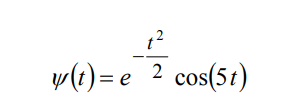

**Масштабирование и сдвиг**

<ipython-input-5-86b74517498d>:9: RuntimeWarning: divide by zero encountered in divide
  psi = exp(-((t-b)/a)**2/2)*cos(5*((t-b)/a))
<ipython-input-5-86b74517498d>:9: RuntimeWarning: invalid value encountered in cos
  psi = exp(-((t-b)/a)**2/2)*cos(5*((t-b)/a))


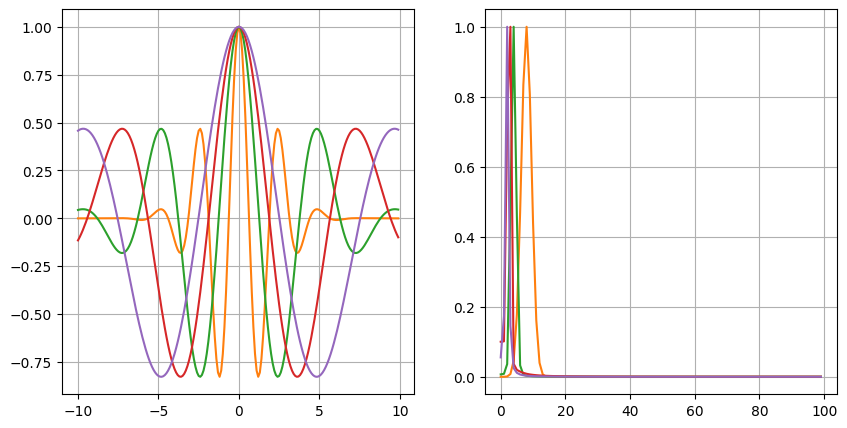

In [5]:
from numpy import *
import matplotlib.pyplot as plt
b = 0
a = 1.5
t = arange(-10, 10,0.1)
plt.figure(figsize =[10, 5])

for a  in range(0,10,2):
  psi = exp(-((t-b)/a)**2/2)*cos(5*((t-b)/a))
  spect = abs(fft.fft(psi))

  plt.subplot(1,2,1)
  plt.plot(t,psi)
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.plot(spect[0:int(len(spect)/2)]/max(spect))
  plt.grid(True)



In [6]:
b = 0
a = 1
sa = []
for b in range(50):
  for a in range(1,50):
    psi = exp(-((t-b)/a)**2/2)*cos(5*((t-b)/a))
    s = cos(2*pi*t*5) + cos(2*pi*t*50)
    sa.append(abs(fft.fft(s*psi))[0:int(len(spect)/2)])

    # plt.figure(figsize= [15, 8])
    # plt.subplot(1,2,1)
    # plt.plot(t,s*psi)

    # plt.subplot(1,2,2)
    # plt.plot(abs(fft.fft(s*psi))[0:int(len(spect)/2)])
sa = array(sa)
print(sa.shape)

(2450, 100)


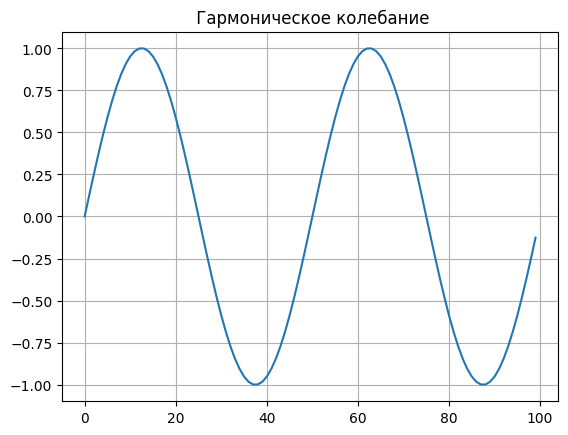

<Figure size 640x480 with 0 Axes>

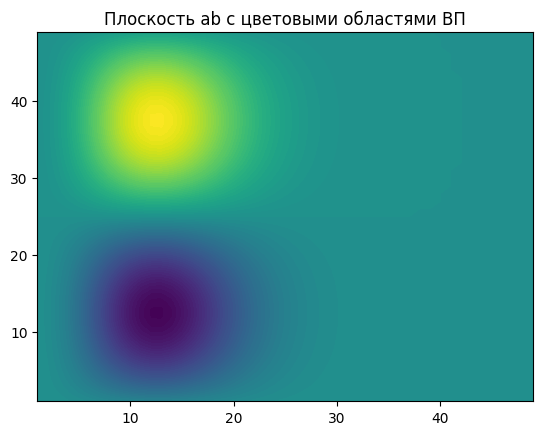

In [7]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
T=50
def S(t):
    return sin(2*pi*t/T)
plt.figure()
plt.title(' Гармоническое колебание', size=12)
y=[S(t) for t in arange(0,100,1)]
x=[t for t in arange(0,100,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,50,1)
y = arange(1,50,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(49,49)
fig = plt.figure("Вейвлет- спектр: гармонического колебания")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z,100)
plt.show()

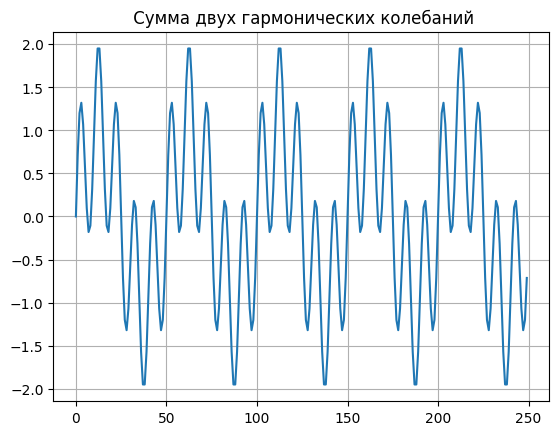

<Figure size 640x480 with 0 Axes>

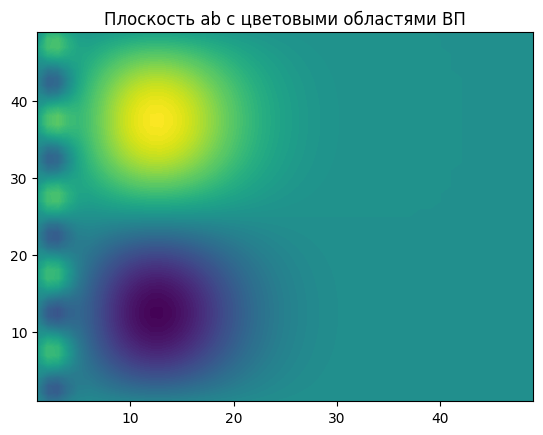

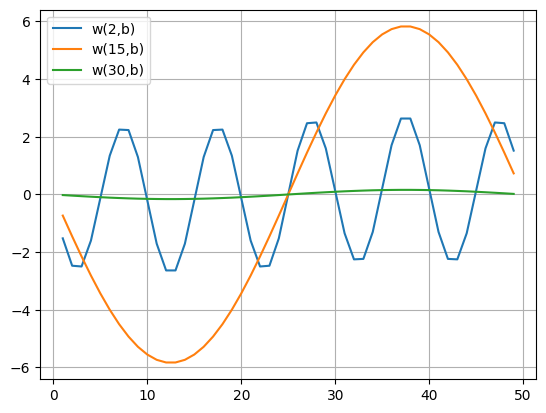

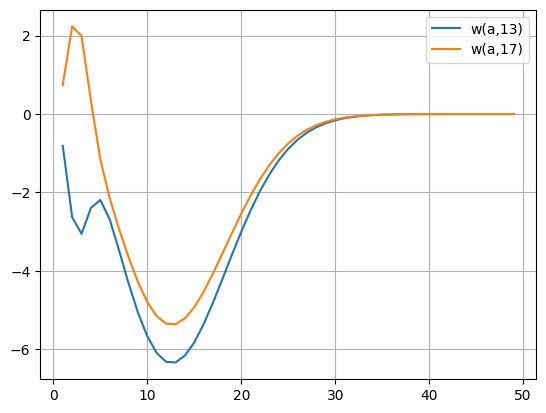

In [8]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
N=256
def S(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50)
plt.figure(' Сумма двух гармонических колебаний')
plt.title(' Сумма двух гармонических колебаний', size=12)
y=[S(t) for t in arange(0,250,1)]
x=[t for t in arange(0,250,1)]
plt.plot(x,y)
plt.grid()
def w(a,b):
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*S(t)
    r= quad(f, -N, N)
    return round(r[0],3)
x = arange(1,50,1)
y = arange(1,50,1)
z = array([w(i,j) for j in y for i in x])
X, Y = meshgrid(x, y)
Z = z.reshape(49, 49)
fig = plt.figure("Вейвлет-спектр:2-х гармонических колебаний")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')
plt.figure("2D-график для z = w (a,b)")
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(X, Y, Z, 100)
plt.figure()
q=[w(2,i) for i in y]
p=[i for i in y]
plt.plot(p,q,label='w(2,b)')
q=[w(15,i) for i in y]
plt.plot(p,q,label='w(15,b)')
q=[w(30,i) for i in y]
plt.plot(p,q,label='w(30,b)')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
q=[w(i,13) for i in x]
p=[i for i in x]
plt.plot(p,q,label='w(a,13)')
q=[w(i,17) for i in x]
plt.plot(p,q,label='w(a,17)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [9]:
import pywt
print(pywt.families(short=False))


['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


# **Python code for CWT of 1-D signal**

**Формула перехода между частотой и масштабом**

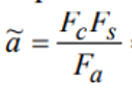

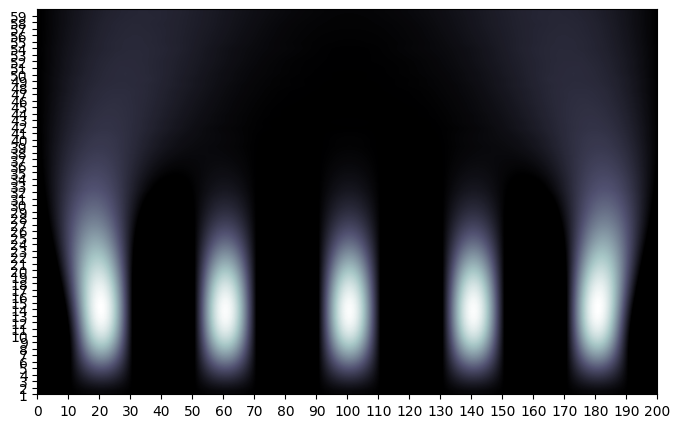

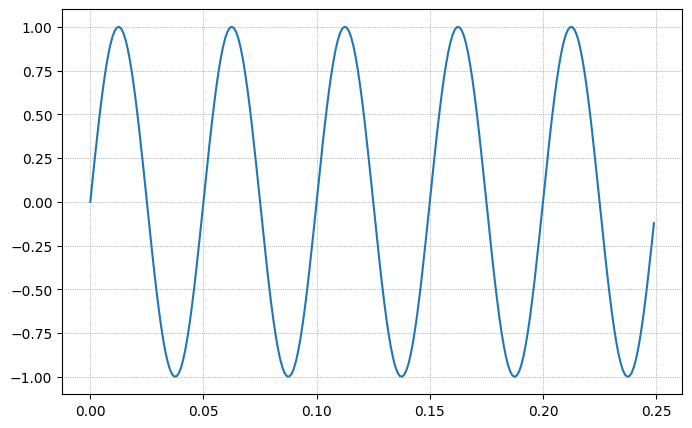

3.250793650793651

In [81]:
import pywt

fs = 1024
T = 0.25
dt = 1/fs
t = np.arange(0, T, dt)
f = 20
x = np.sin(2*np.pi*f*t)
wname = 'gaus1'
# fcent = pywt.centfrq(wname)
fcent = 0.25
f_min  = 4
f_max = 256
a_max = fcent/f_min/dt # a_max = fcent /  f_min * fs
a_min = fcent/f_max/dt
a = np.arange(a_min, a_max)
coef, freqs = pywt.cwt(x, a, wname)  # Finding CWT using gaussian wavelet
# #  Plotting scalogram
plt.figure(figsize=(8, 5))
plt.imshow((coef), extent=[0, 200, 60, 1], interpolation='bilinear', cmap='bone',
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 60, 1))
plt.xticks(np.arange(0, 201, 10))
plt.show()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, x)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()



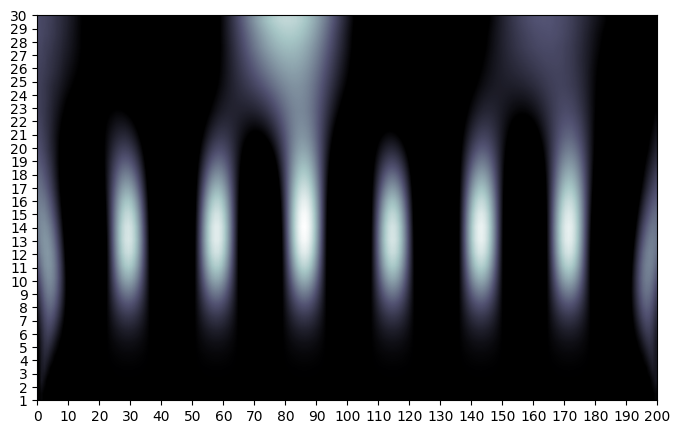

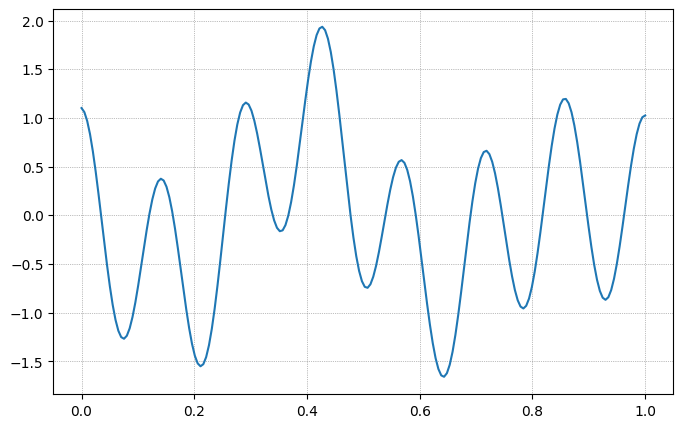

In [40]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 200)
# Finding signal by adding three different signals
signal = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7 * (t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
scales = np.arange(1, 31)  # No. of scales
coef, freqs = pywt.cwt(signal, scales, 'gaus4')  # Finding CWT using gaussian wavelet
# #  Plotting scalogram
plt.figure(figsize=(8, 5))
# plt.imshow(coef, extent=[0, 200, 30, 1], interpolation='bilinear', aspect='auto', cmap='bone')
plt.imshow((coef), extent=[0, 200, 30, 1], interpolation='bilinear', cmap='bone',
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 31, 1))
plt.xticks(np.arange(0, 201, 10))
plt.show()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()


**Python code for CWT of discontinuous signals**


<ipython-input-44-5a4ce05b0e17>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nos = np.int(Fs*tclip)  #No of samples in 10ms


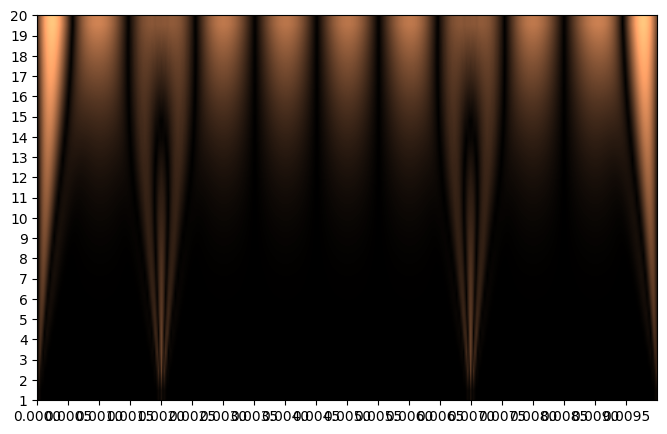

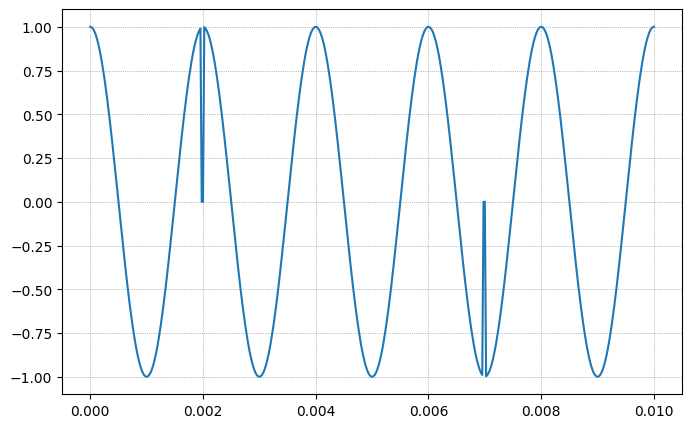

In [44]:
Fs = 44100.0  #Samples per second
tclip = 10e-3
nos = np.int(Fs*tclip)  #No of samples in 10ms
tpoints = np.linspace(0, 10e-3, nos) #Time points
x = np.cos(2*np.pi*500*tpoints)  #cos(2*pi*f*t) signal
scales = np.arange(1, 21, 1)  #No. of scales=20
x[87:89] = 0  #Giving discontinuity
x[307:309] = 0  #Giving discontinuity

coef, freqs = pywt.cwt(x, scales, 'gaus4')  # Finding CWT using gaussian wavelet

# Plotting scalogram
plt.figure(figsize=(8, 5))
plt.imshow(abs(coef), extent=[0, 10e-3, 20, 1], interpolation='bilinear', cmap='copper',
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 21, 1))
plt.xticks(np.arange(0, nos/Fs, nos/(20*Fs)))
plt.show()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(tpoints, x)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()